# Racks_f 하루 rack 별 Tmp와 SoC 그래프

rack 마다 하루의 tmp와 SoC의 그래프를 그려봄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# racks_f_df = pd.read_csv(r'dataset\racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})
racks_f_df = pd.read_csv(r'racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [3]:
racks_f_df['Time'] = pd.to_datetime(racks_f_df['Time'])

In [4]:
df = racks_f_df.loc[:, ['Time',
                        'Tmp', 'TmpMax','TmpMin',
                        'VCell', 'VCellMax', 'VCellMin',
                        'A', 'AChaMax', 'ADisChaMax',
                        'EvtVnd1', 'EvtVnd2', 'EvtVnd3',
                        'SoC', 'SoH', 'V', 'Racks']]

In [5]:
normal_df = df[(df['EvtVnd1'].isna() & df['EvtVnd2'].isna() & df['EvtVnd3'].isna())]

In [6]:
normal_tmp_df = normal_df.loc[:, ['Time', 'Tmp']]
normal_tmp_df['Time'] = normal_tmp_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_tmp_df.drop(normal_tmp_df.loc[normal_tmp_df['Tmp'] <= 0.0].index, inplace=True)
normal_tmp_mean_df = normal_tmp_df.groupby(by='Time').agg({'Tmp':'mean'})

In [7]:
normal_tmp_df.shape

(5162812, 2)

In [8]:
normal_tmp_df.dropna().shape

(5160552, 2)

In [9]:
normal_tmp_df = normal_tmp_df.dropna()
normal_tmp_mean_df = normal_tmp_df.groupby(by='Time').agg({'Tmp':'mean'})

In [10]:
normal_tmp_mean_df.describe()

,Tmp
count,1440.000000
mean,24.558130
std,0.277939
min,24.011320
25%,24.425469
50%,24.521384
75%,24.626761
max,25.577998


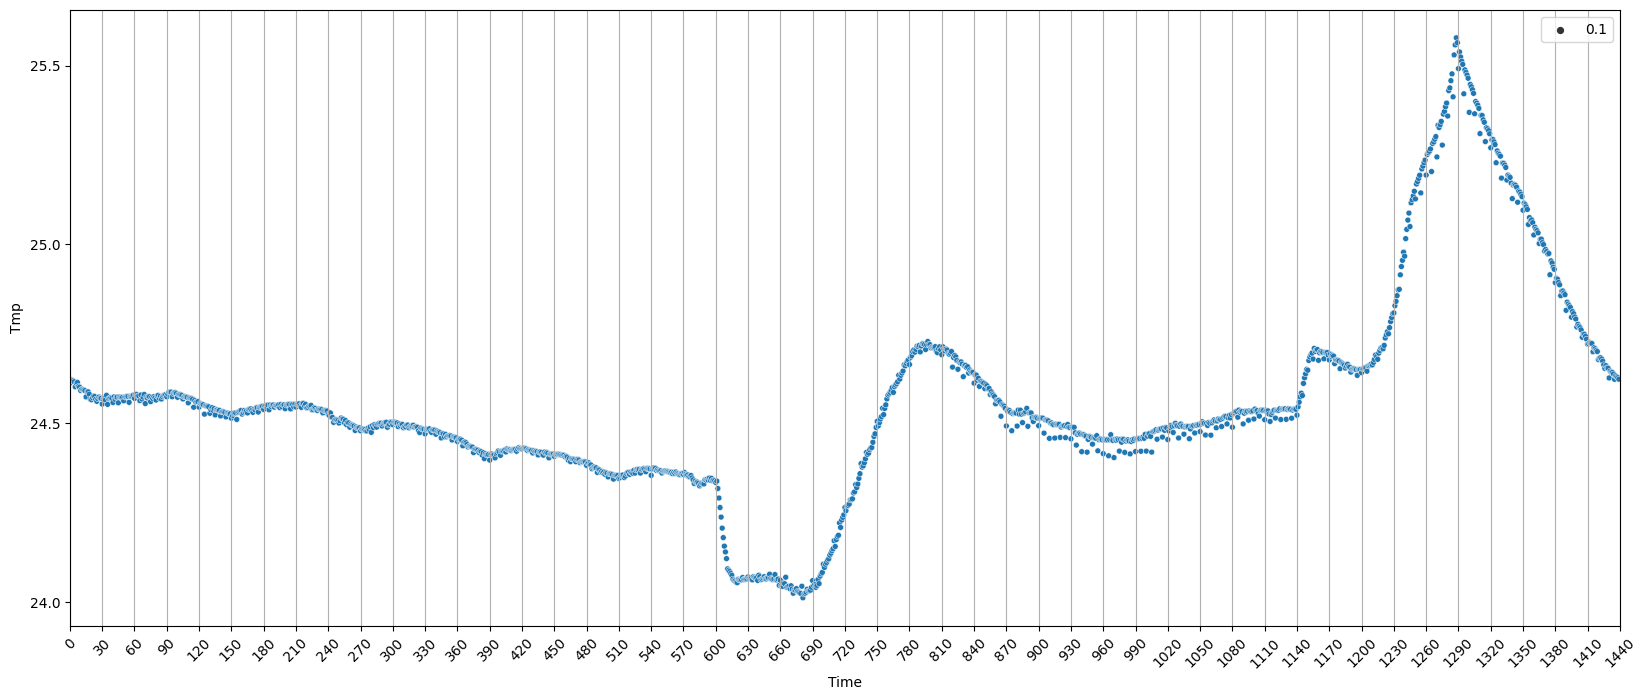

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))

# sns.lineplot(data=normal_tmp_df, x='Time', y='Tmp', ax=ax, legend=False)
sns.scatterplot(data=normal_tmp_mean_df, x='Time', y='Tmp', ax=ax, size=0.1)

# ax_2 = ax.twinx()
# sns.lineplot(data=normal_SoC_df, x='Time', y='SoC', ax=ax_2, color='#EB7A7A')

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
# ax_2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.grid(True)
ax.tick_params(axis='x', labelrotation=45)

plt.xlim((0, 1440))

# fig.legend(labels=["Tmp", "Tmp", "SoC", "SoC"])

plt.show()

In [12]:
normal_tmp_df = normal_df.loc[:, ['Time', 'Tmp', 'Racks']]
normal_tmp_df['Time'] = normal_tmp_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_tmp_df.drop(normal_tmp_df.loc[normal_tmp_df['Tmp'] <= 0.0].index, inplace=True)
normal_tmp_df = normal_tmp_df.dropna()

In [13]:
normal_tmp_mean_racks_df = pd.DataFrame(columns=['Time', 'Tmp', 'Racks'])

for i in range(14):
    temp_df = normal_tmp_df[normal_tmp_df['Racks'] == f'racks_{i}'].groupby(by='Time', as_index=False).agg({'Tmp':'mean'})
    temp_df['Racks'] = f"racks_{i}"
    normal_tmp_mean_racks_df = normal_tmp_mean_racks_df.append(temp_df)

normal_tmp_mean_racks_df = normal_tmp_mean_racks_df.reset_index(drop=True)

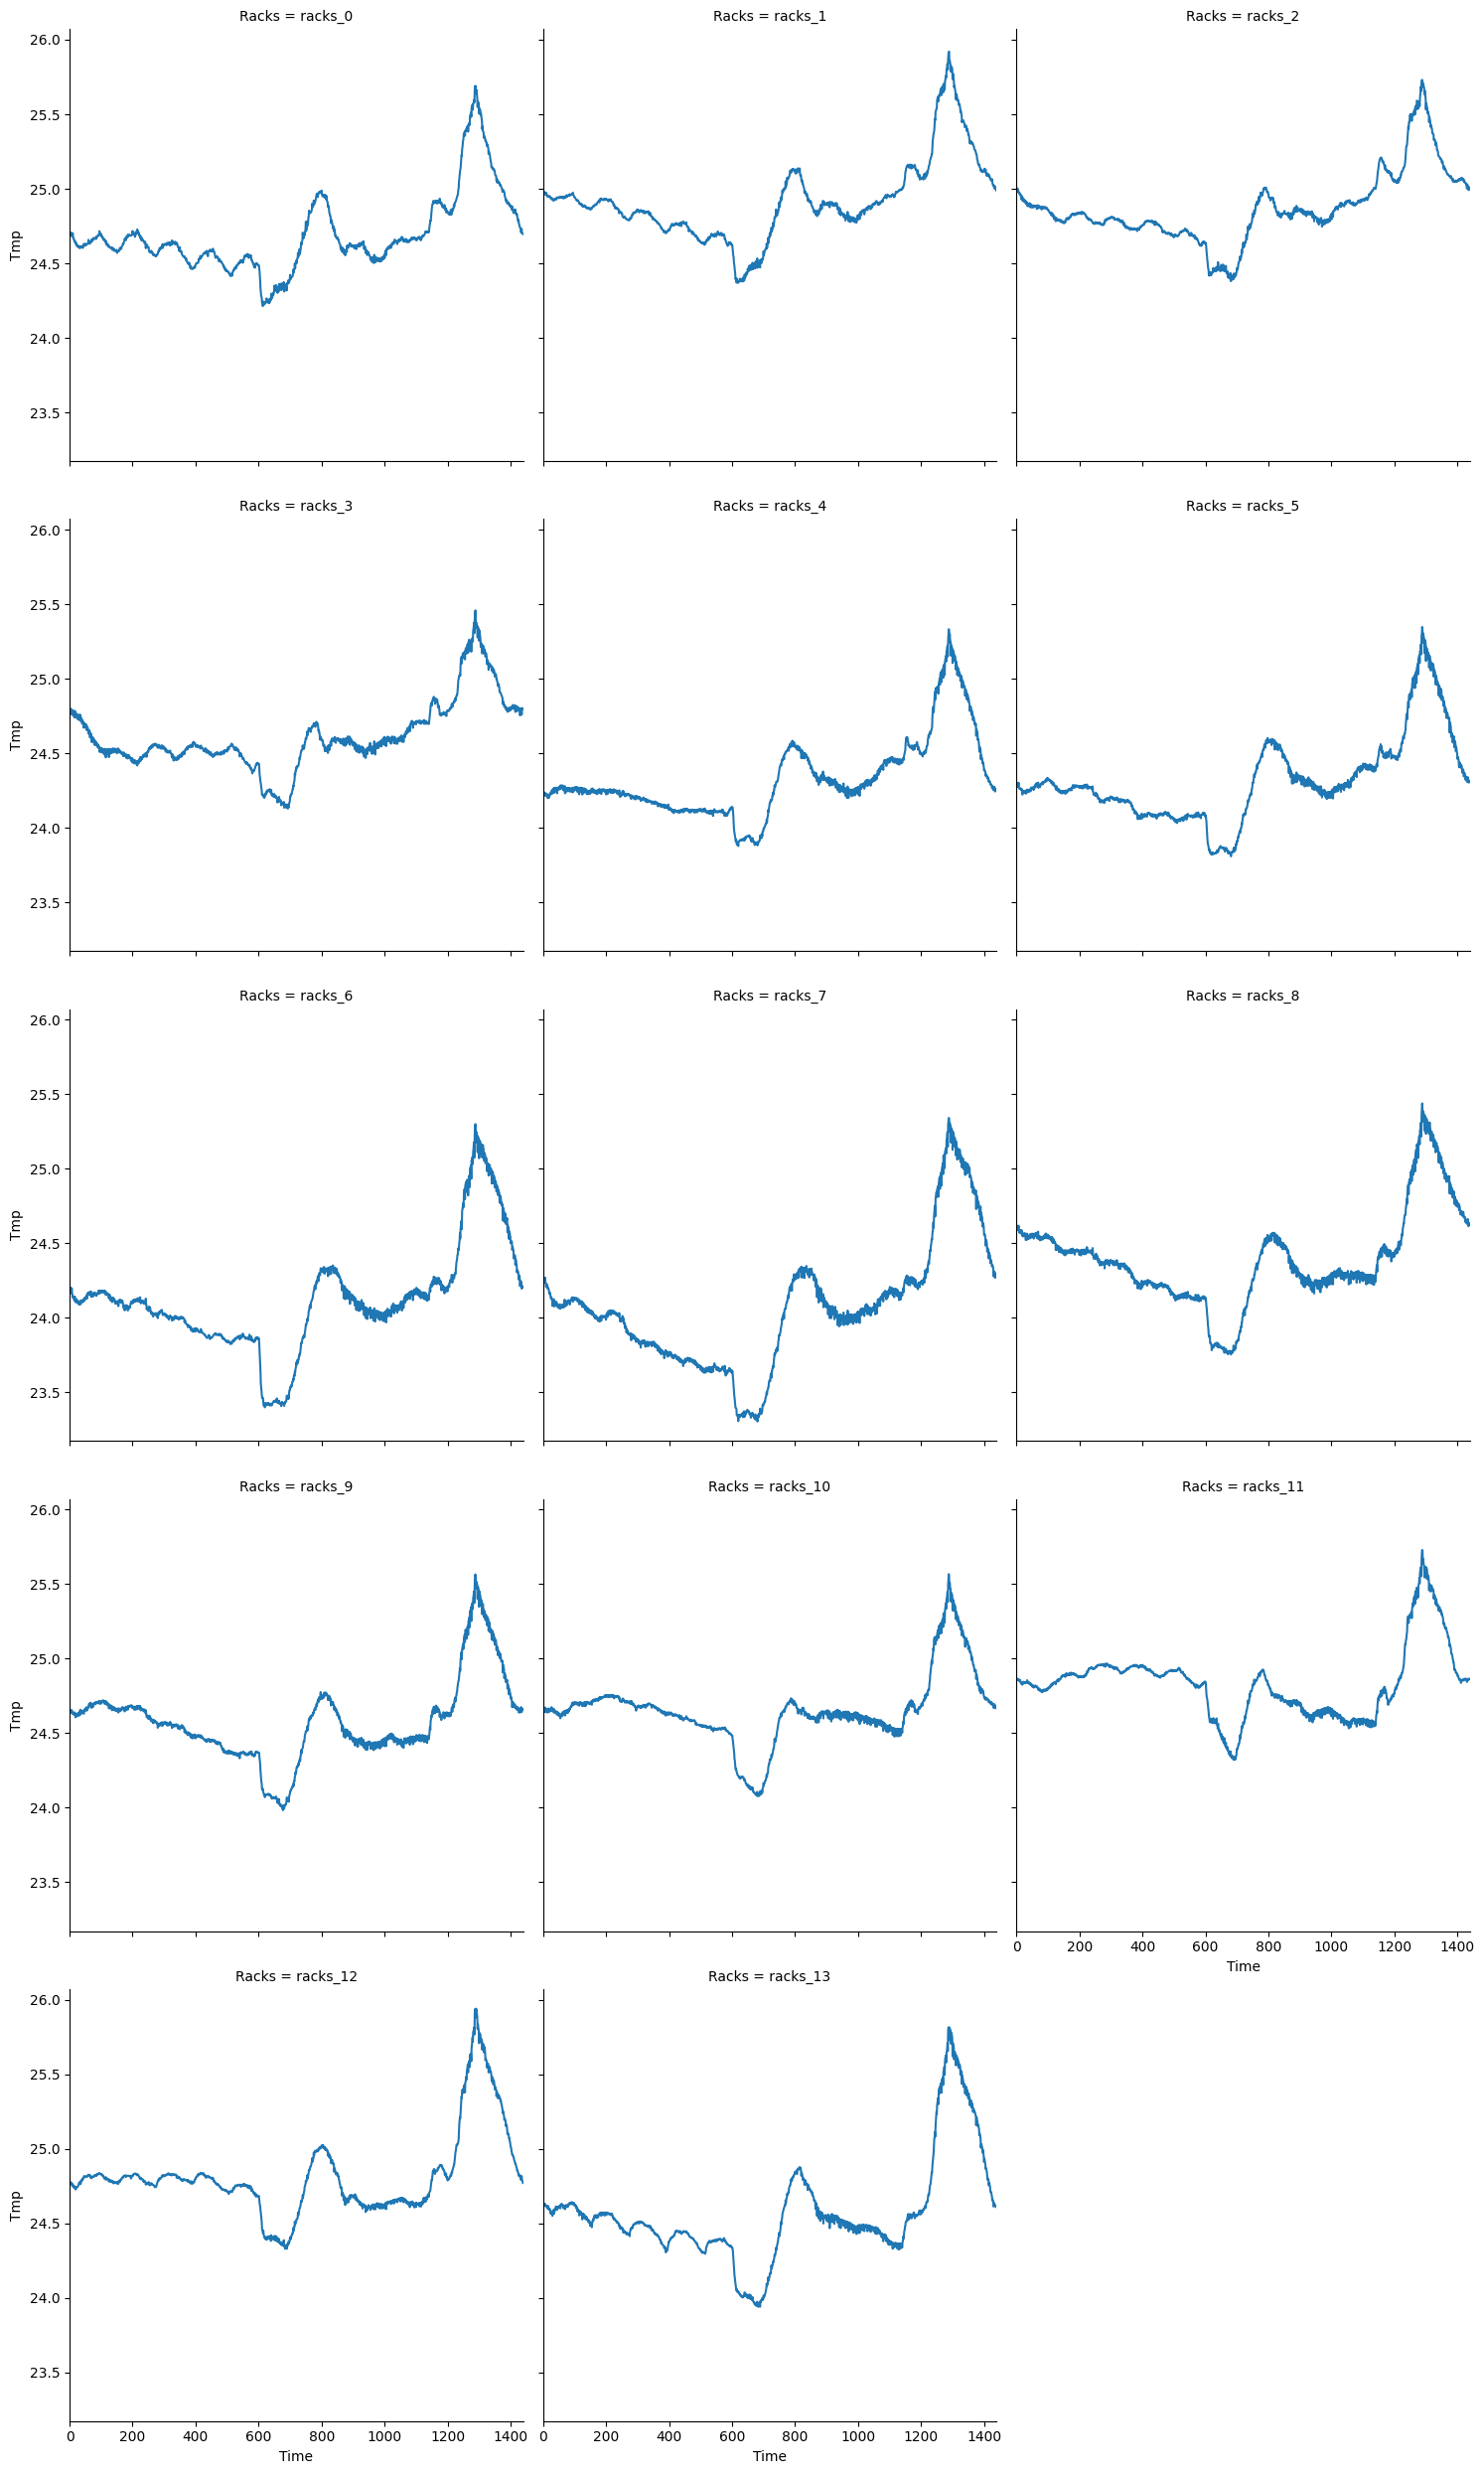

In [14]:
# fig, ax = plt.subplots(figsize=(20, 8))

sns.relplot(data=normal_tmp_mean_racks_df, x='Time', y='Tmp', col='Racks', col_wrap=3, kind="line")

# ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

# ax.xaxis.grid(True)
# ax.tick_params(axis='x', labelrotation=45)

plt.xlim((0, 1440))

plt.show()

In [15]:
normal_SoC_df = normal_df.loc[:, ['Time', 'SoC', 'Racks']]
normal_SoC_df['Time'] = normal_SoC_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_SoC_df.drop(normal_SoC_df.loc[normal_SoC_df['SoC'] <= 0.0].index, inplace=True)
normal_SoC_df = normal_SoC_df.dropna()

In [16]:
normal_SoC_mean_racks_df = pd.DataFrame(columns=['Time', 'Tmp', 'Racks'])

for i in range(14):
    temp_df = normal_SoC_df[normal_SoC_df['Racks'] == f'racks_{i}'].groupby(by='Time', as_index=False).agg({'SoC':'mean'})
    temp_df['Racks'] = f"racks_{i}"
    normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.append(temp_df)

normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.reset_index(drop=True)

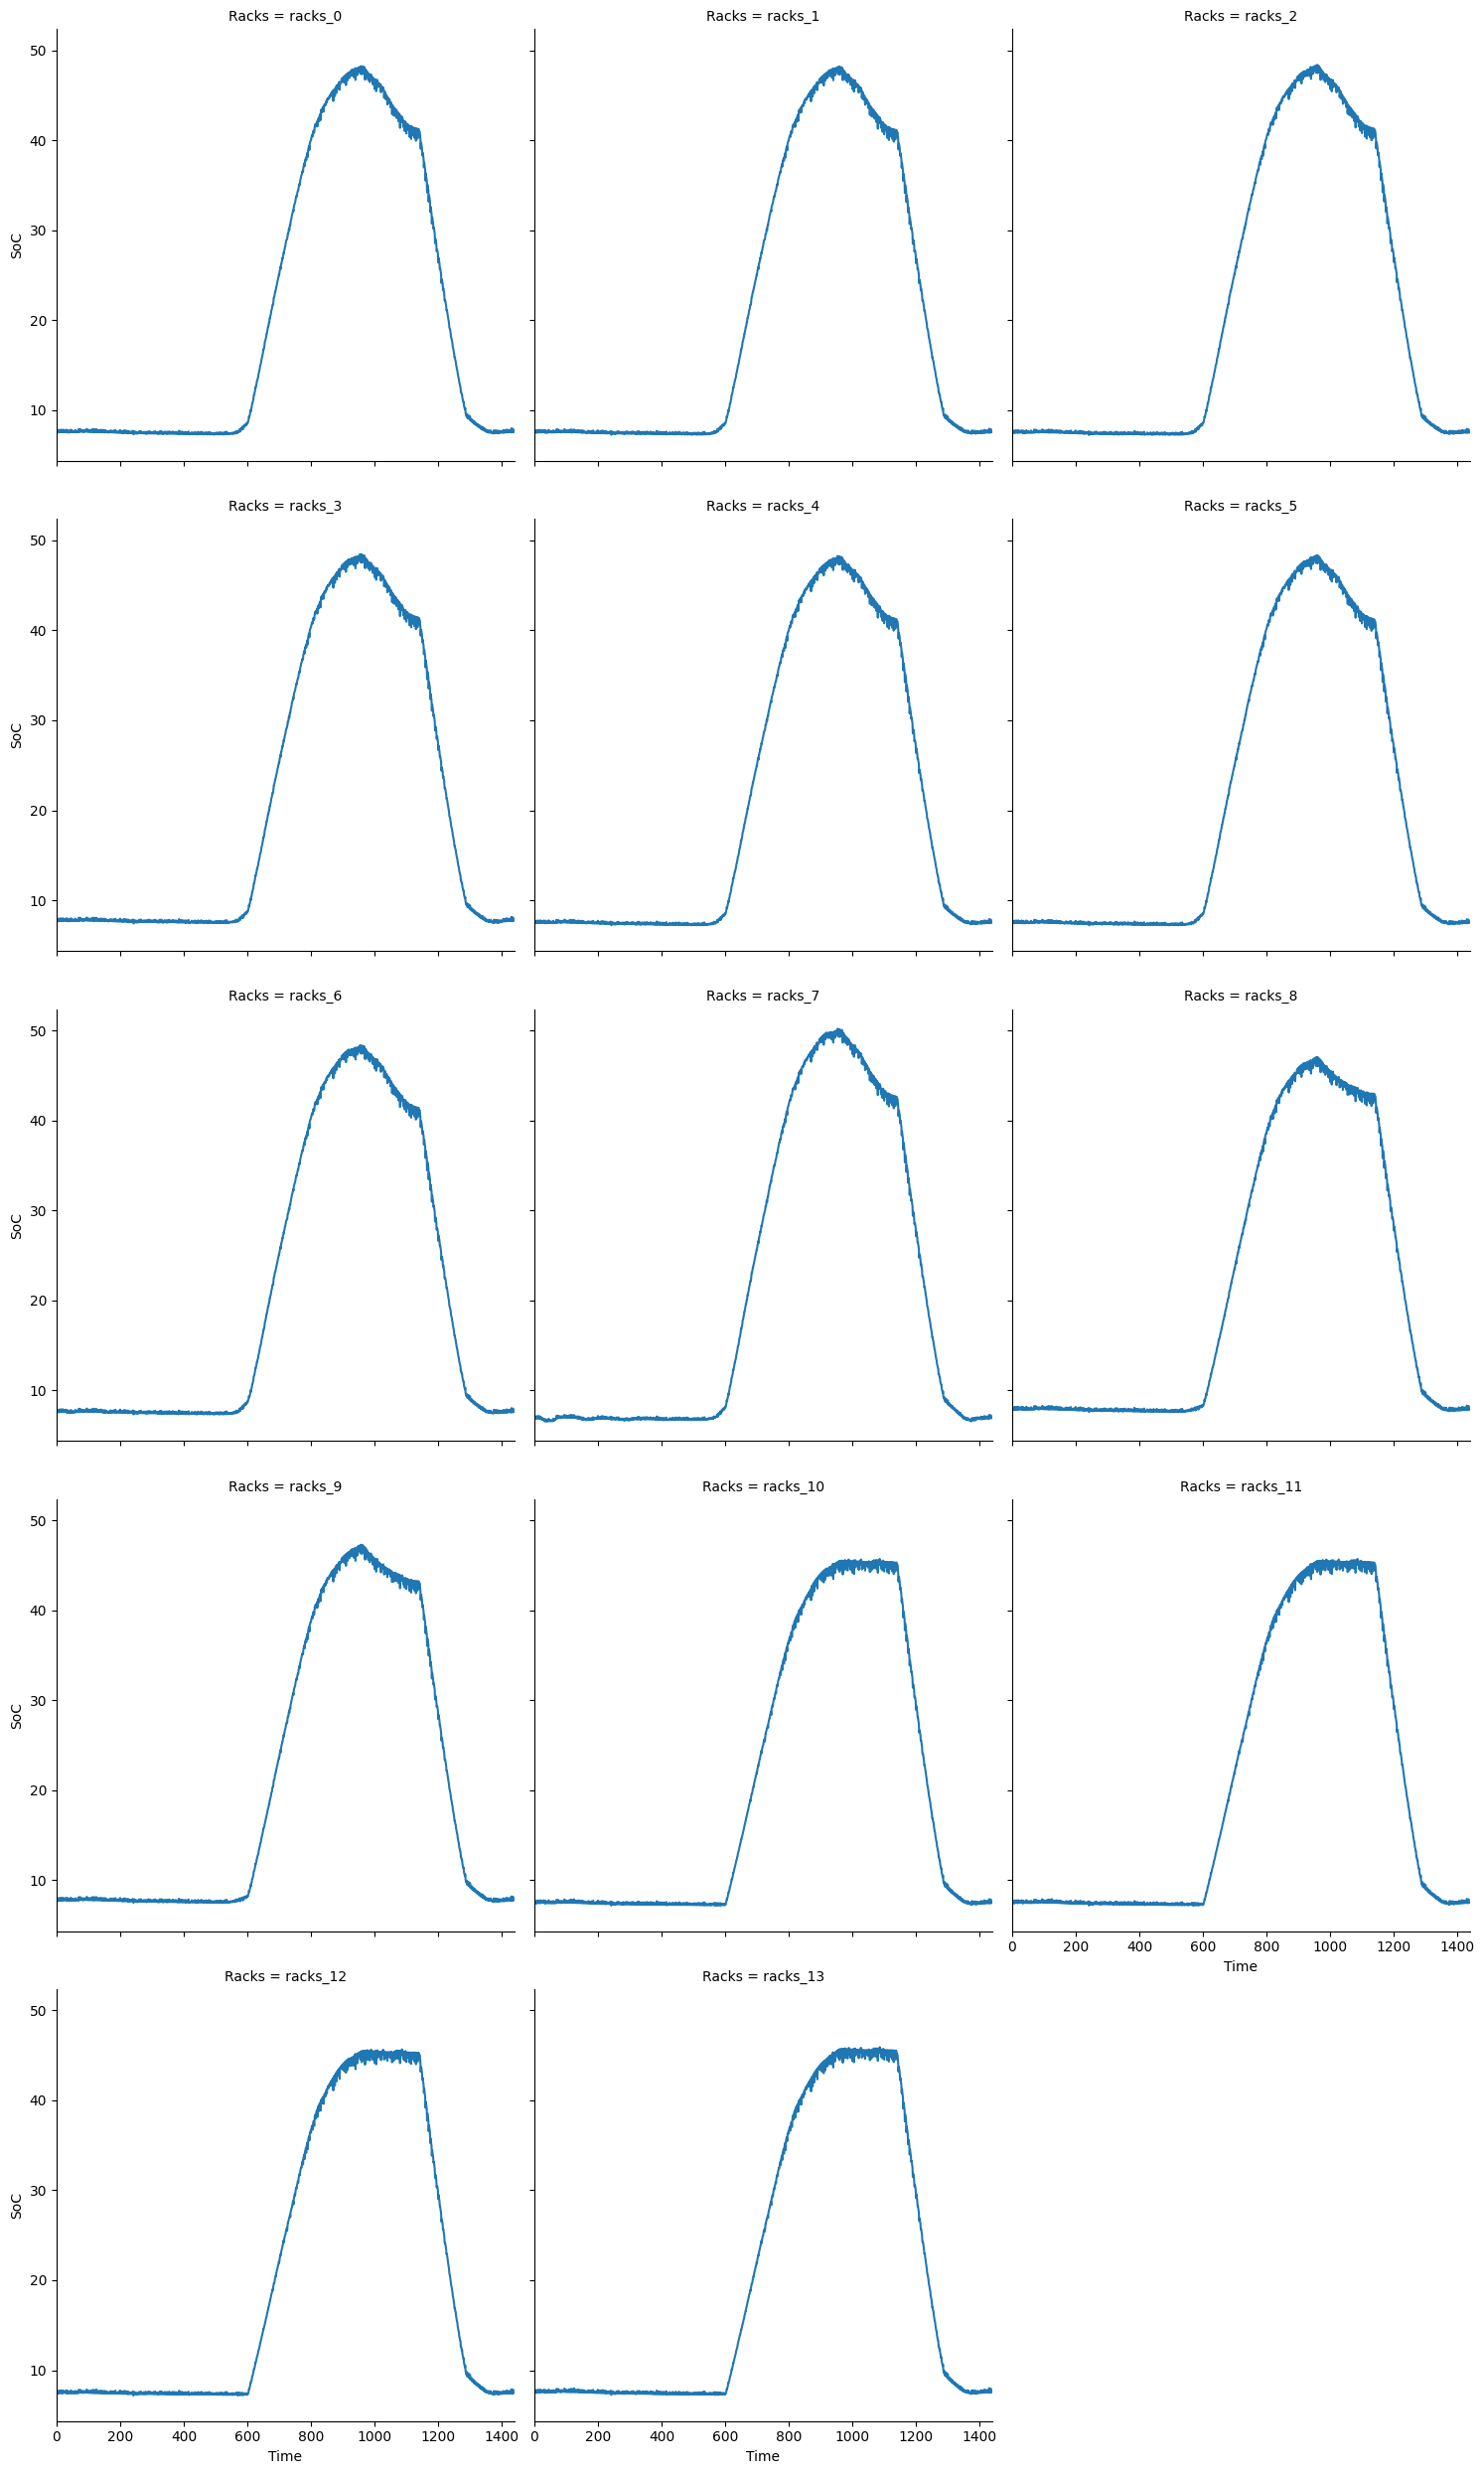

In [17]:
sns.relplot(data=normal_SoC_mean_racks_df, x='Time', y='SoC', col='Racks', col_wrap=3, kind="line")

plt.xlim((0, 1440))

plt.show()

In [18]:
normal_SoH_df = normal_df.loc[:, ['Time', 'SoH', 'Racks']]
normal_SoH_df['Time'] = normal_SoH_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_SoH_df.drop(normal_SoH_df.loc[normal_SoH_df['SoH'] <= 0.0].index, inplace=True)
normal_SoH_df = normal_SoH_df.dropna()

In [22]:
normal_SoH_mean_racks_df = pd.DataFrame(columns=['Time', 'Racks'])

for i in range(14):
    temp_df = normal_SoH_df[normal_SoH_df['Racks'] == f'racks_{i}'].groupby(by='Time', as_index=False).agg({'SoH':'mean'})
    temp_df['Racks'] = f"racks_{i}"
    normal_SoH_mean_racks_df = normal_SoH_mean_racks_df.append(temp_df)

normal_SoH_mean_racks_df = normal_SoH_mean_racks_df.reset_index(drop=True)

In [29]:
normal_SoH_df.describe()

,Time,SoH
count,5.160552e+06,5.160552e+06
mean,7.198236e+02,9.846609e+01
std,4.149228e+02,4.739512e-01
min,0.000000e+00,9.700000e+01
25%,3.610000e+02,9.800000e+01
50%,7.210000e+02,9.850000e+01
75%,1.078000e+03,9.850000e+01
max,1.439000e+03,1.000000e+02


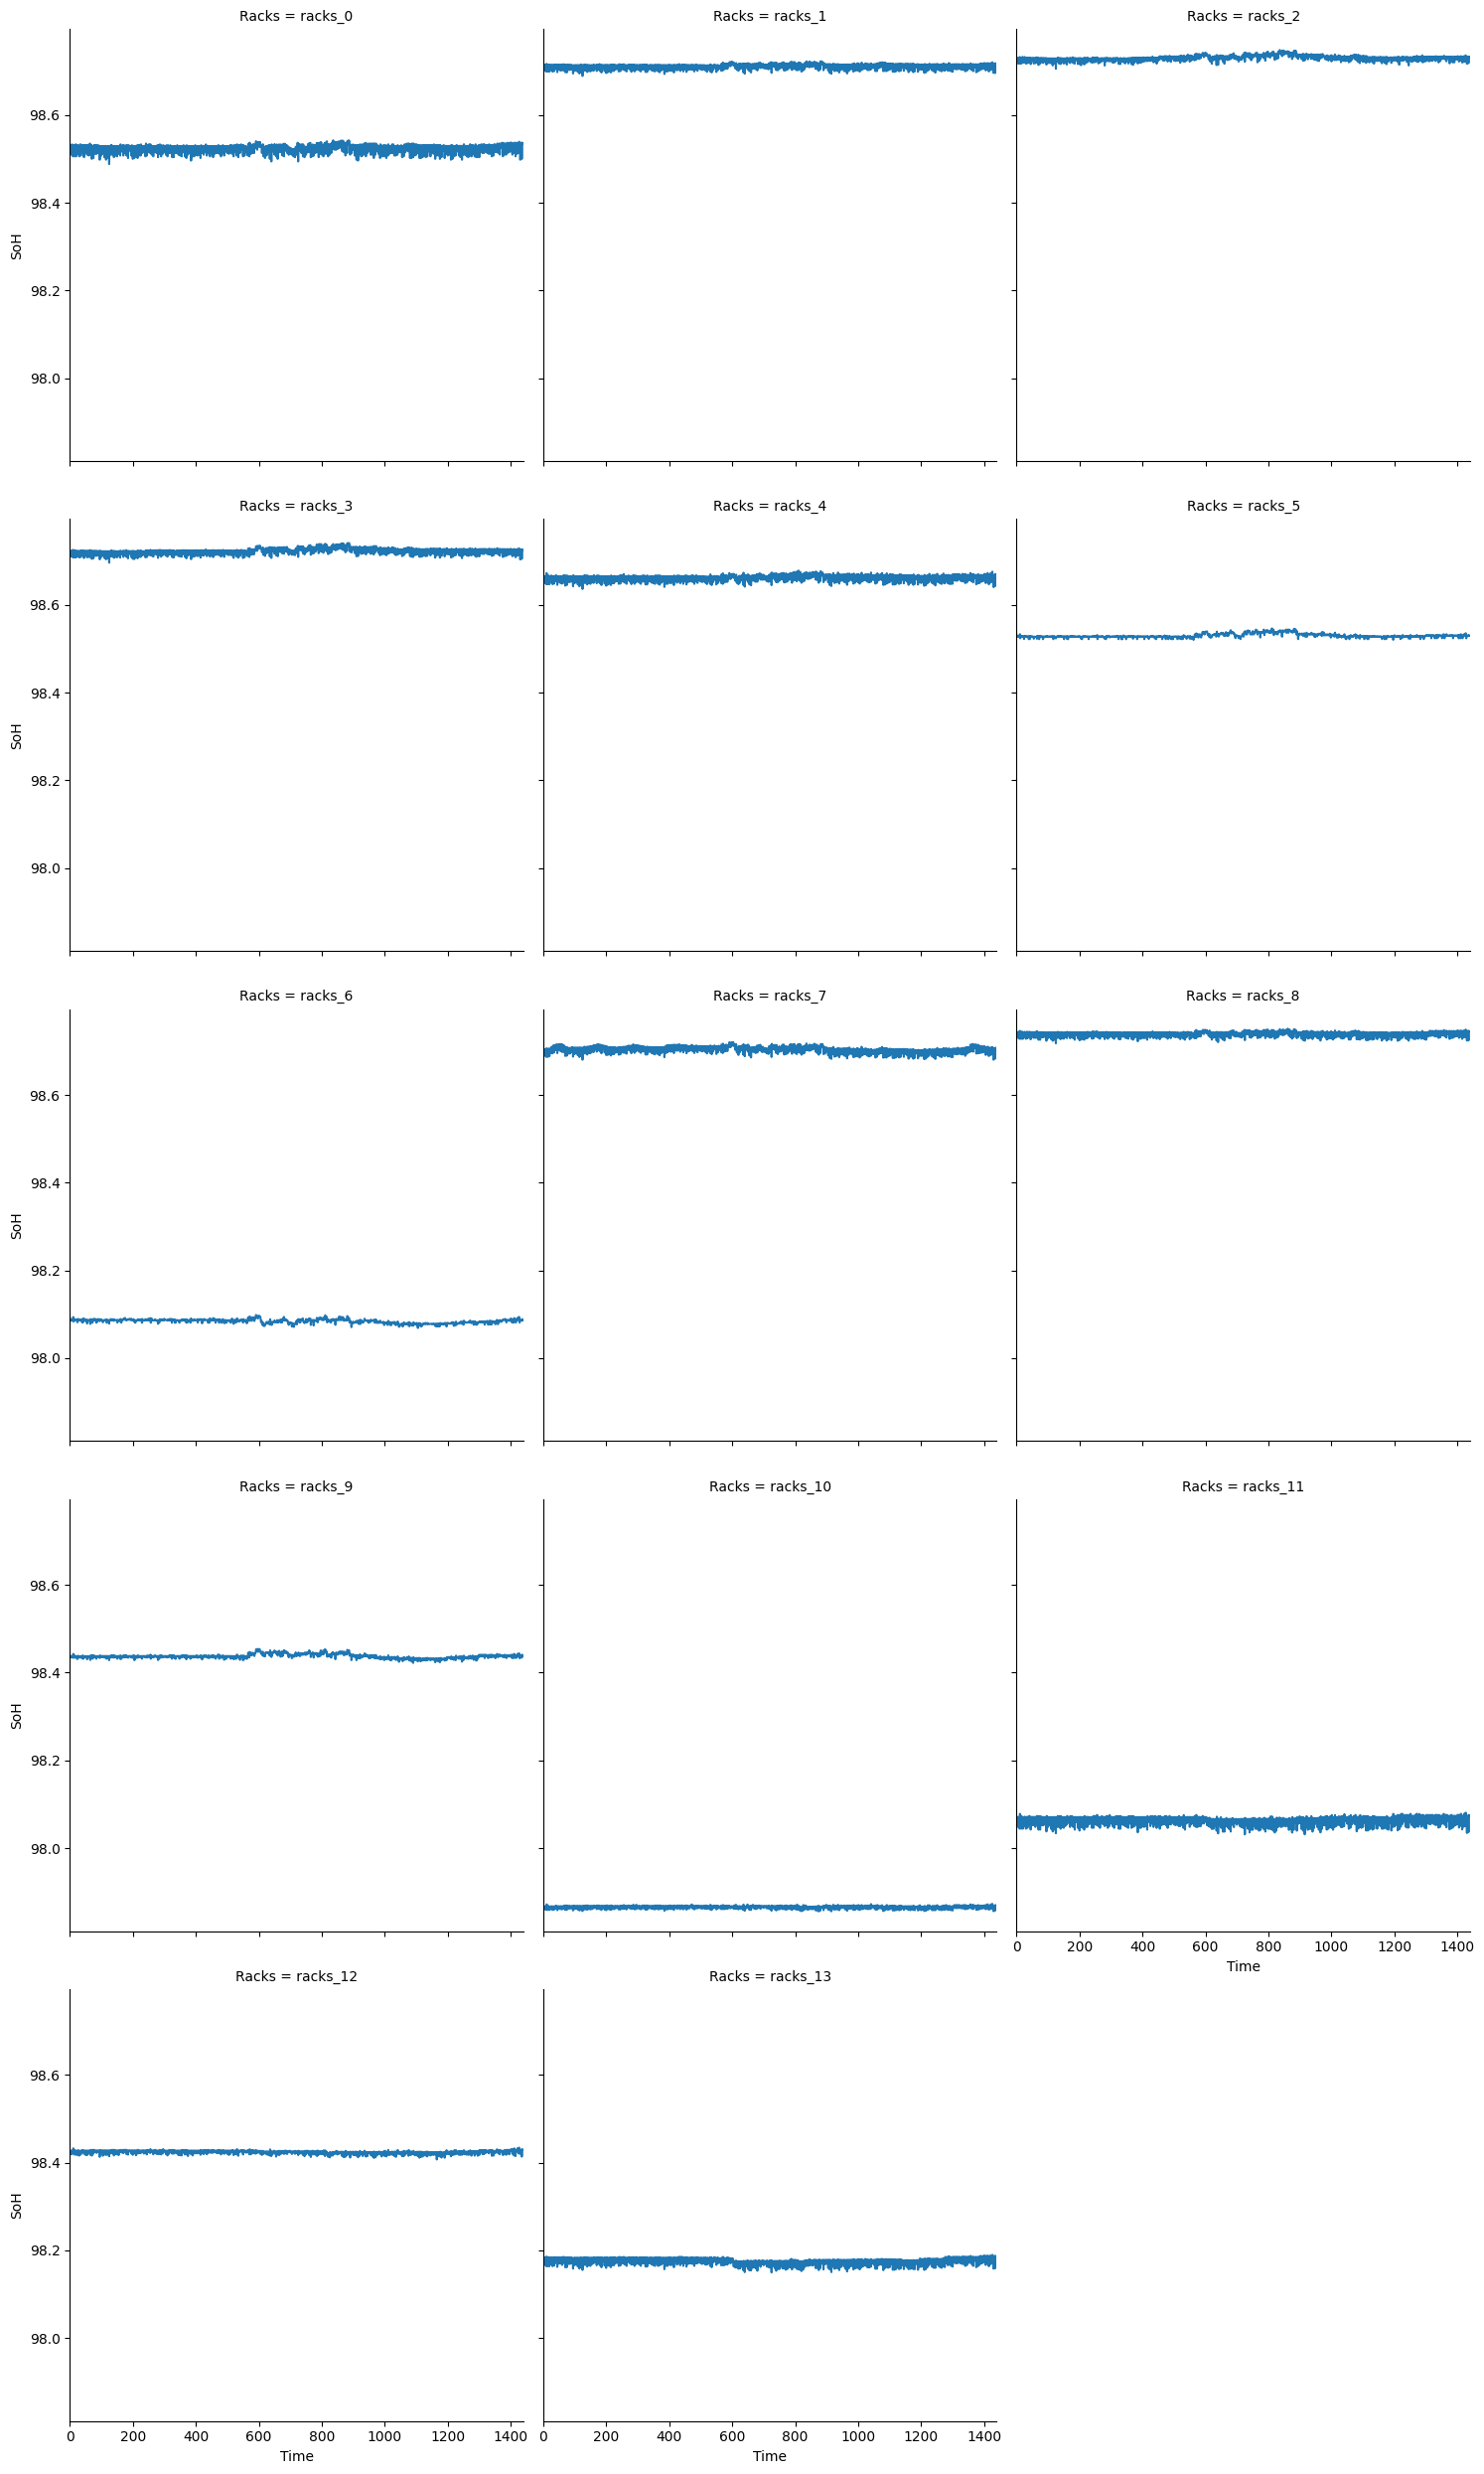

In [20]:
# sns.relplot(data=normal_SoH_mean_racks_df, x='Time', y='SoH', col='Racks', col_wrap=3, kind="line")

# plt.xlim((0, 1440))

# plt.show()